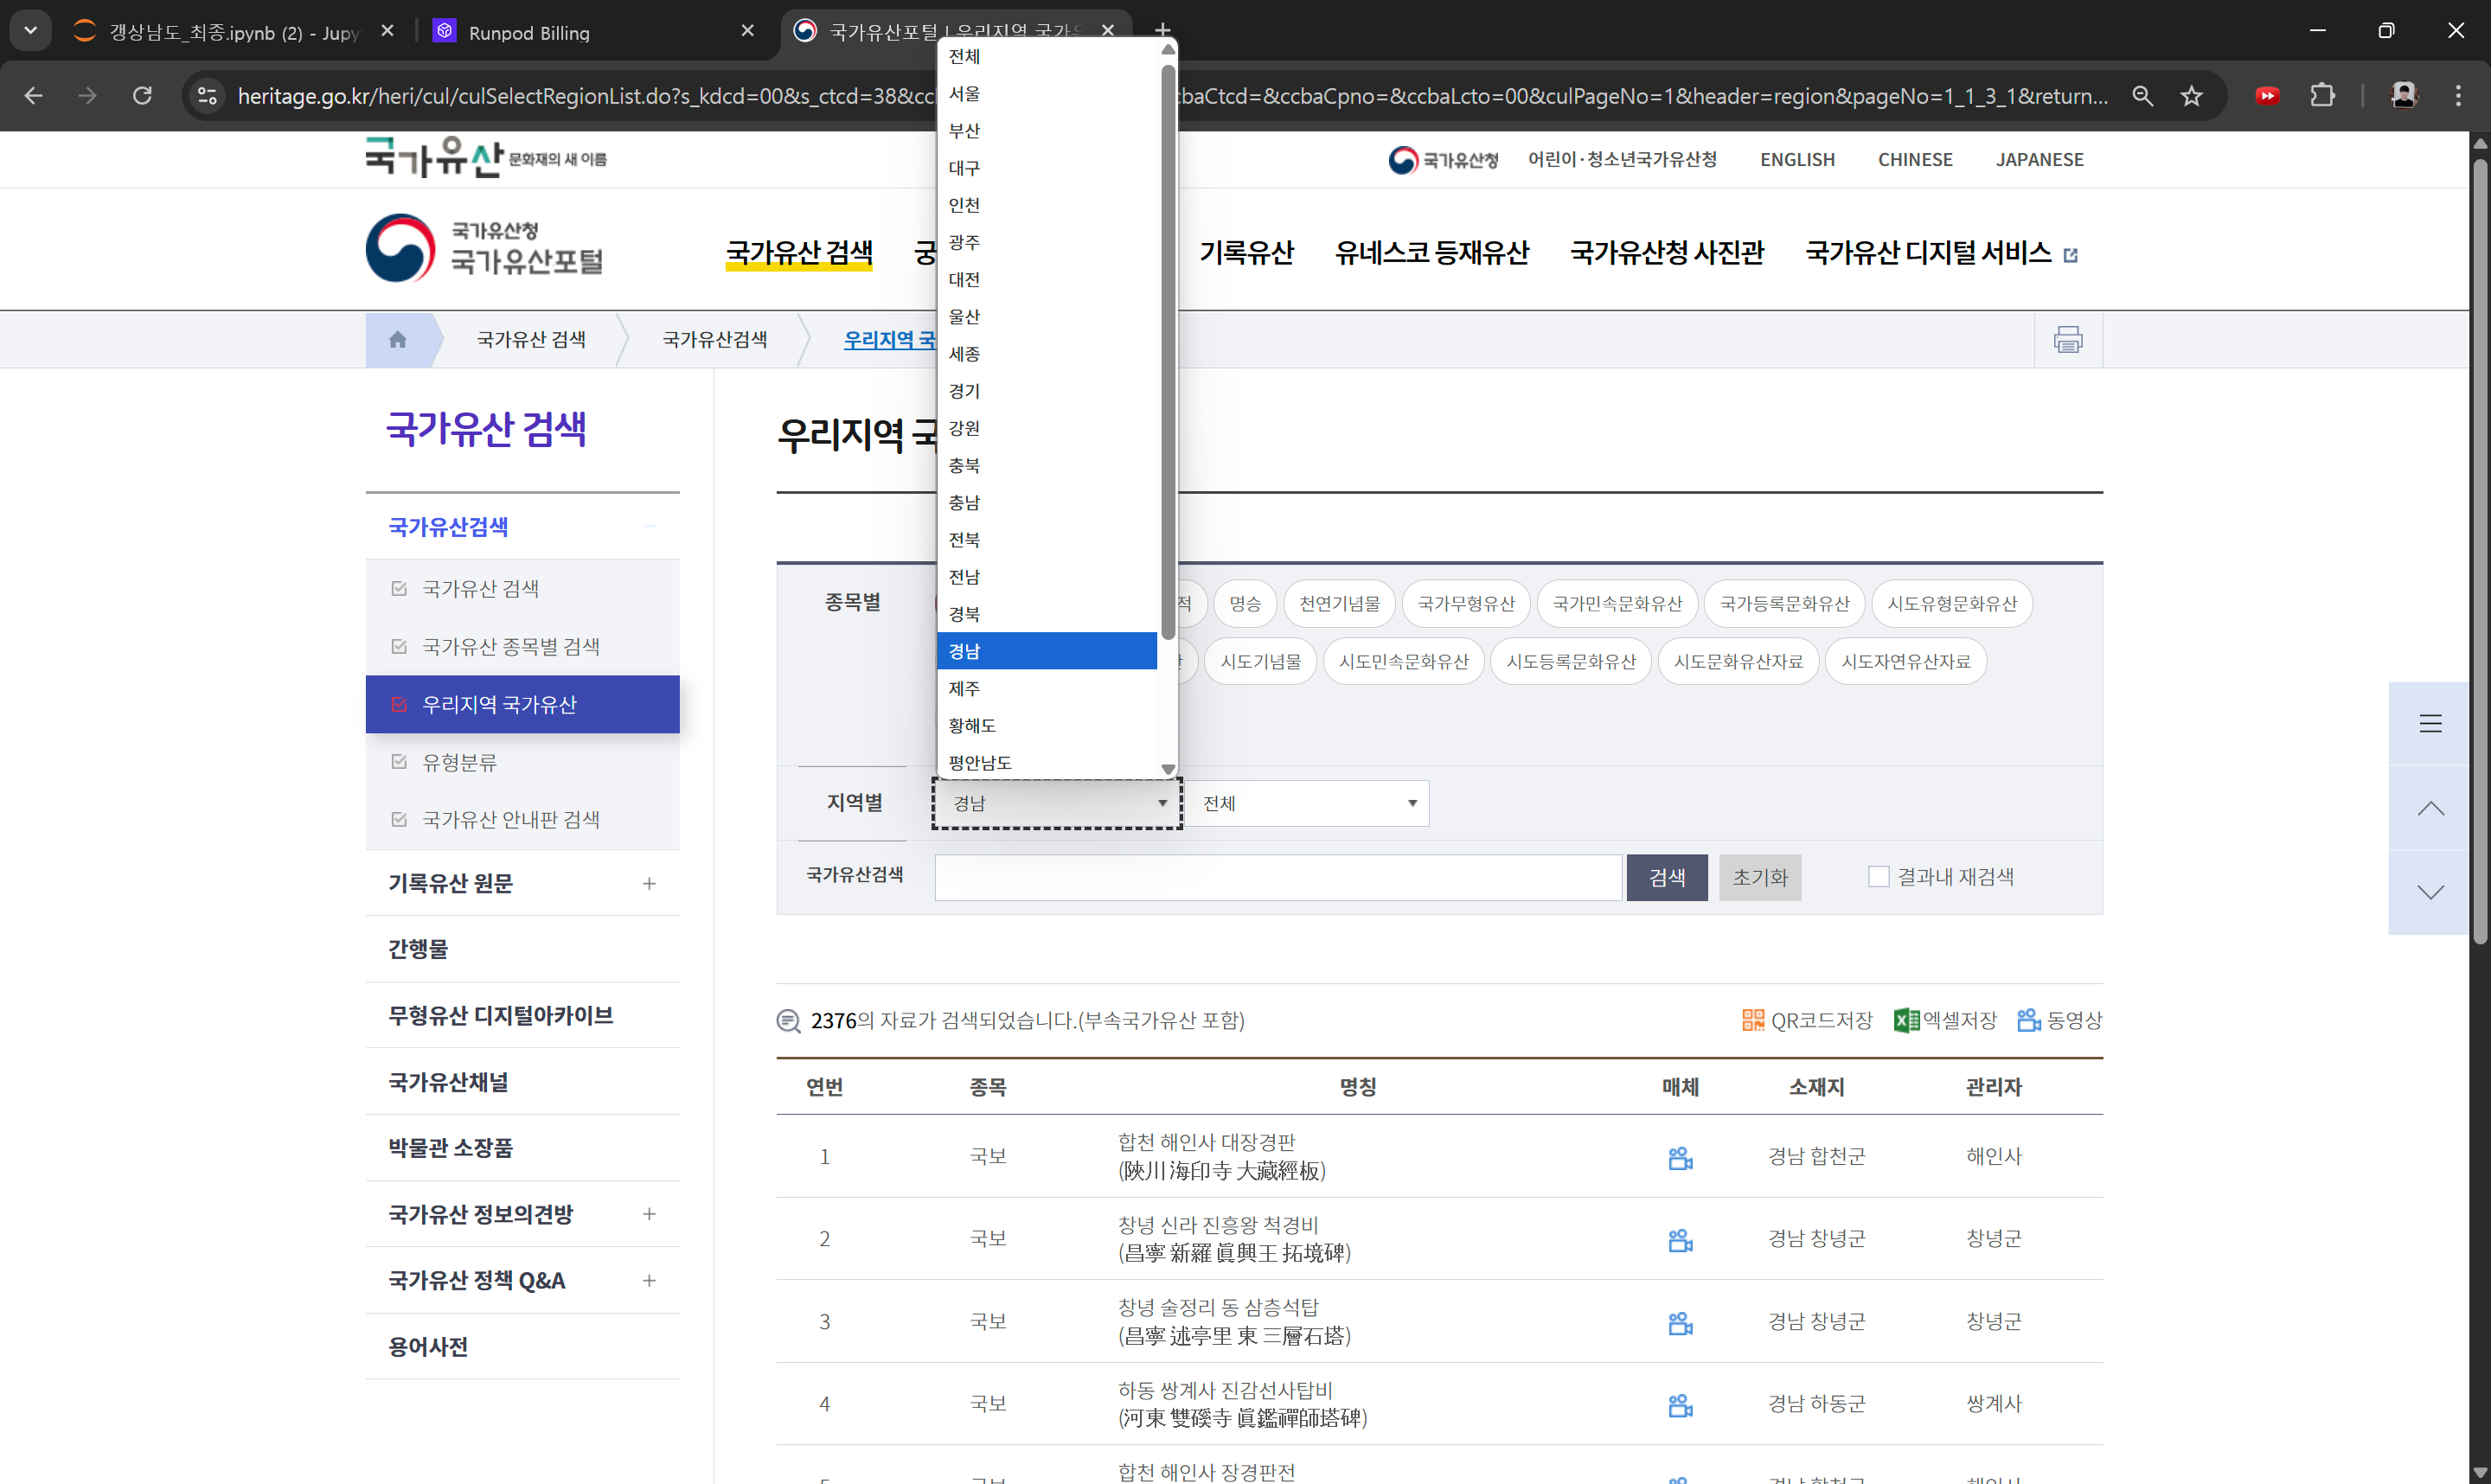
## <span style="color: skyblue;"> 1. list_url_template 에 위 사진의 지역 선택 후 링크 복사.</span>
## <span style="color: skyblue;">2. 페이지 항목에 <span style="color: red;">{page}</span>로 고치기
<span style="color: skyblue;">example : https://www.heritage.go.kr/heri/cul/culSelectRegionList.do?s_kdcd=00&s_ctcd=38&ccbaKdcd=&ccbaAsno=&ccbaCtcd=&ccbaCpno=&ccbaLcto=00&culPageNo={page}&header=region&pageNo=1_1_3_1&returnUrl=%2Fheri%2Fcul%2FculSelectRegionList.do&assetnamel=00&searchCondition=&searchCondition2=&region=2</span>

## <span style="color: skyblue;">3. 몇페이지 인지는 수동 ㅎㅎ;</span>
## <span style="color: skyblue;">4. CSV 파일 이름 바꾸기 !</span>

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import csv
import urllib.parse

base_url = "https://www.heritage.go.kr"
list_url_template = "https://www.heritage.go.kr/heri/cul/culSelectRegionList.do?s_kdcd=00&s_ctcd=37&ccbaKdcd=&ccbaAsno=&ccbaCtcd=&ccbaCpno=&ccbaLcto=00&culPageNo={page}&header=region&pageNo=1_1_3_1&returnUrl=%2Fheri%2Fcul%2FculSelectRegionList.do&searchCondition=&searchCondition2=&region=2"

all_data = []
header = ['연번', '종목', '명칭', '소재지', '관리자', '상세페이지링크']

for page_num in range(1, 138):  # 1~238페이지
    print(f"{page_num} 페이지 크롤링 중...")
    url = list_url_template.format(page=page_num)
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, "html.parser")
    rows = soup.select("#txt > table > tbody > tr")
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 6:
            # "매체"(4번째) 열을 제외하고 추출
            num = cols[0].get_text(strip=True)
            category = cols[1].get_text(strip=True)
            name = cols[2].get_text(strip=True)
            location = cols[4].get_text(strip=True)
            manager = cols[5].get_text(strip=True)
            # 상세페이지 링크 추출
            a_tag = cols[2].find('a')
            if a_tag and a_tag.has_attr("href"):
                href = a_tag['href']
                # jsessionid(;)가 있으면 ; 앞까지만 사용, 뒤 파라미터는 그대로
                if ';' in href:
                    path_part = href.split(';')[0]
                    query_part = ''
                    if '?' in href:
                        query_part = '?' + href.split('?', 1)[1]
                    clean_href = path_part + query_part
                else:
                    clean_href = href
                # 사이트가 ®ion=2로 잘못 넣은 부분을 &region=2로 교정
                clean_href = clean_href.replace('®ion', '&region')
                link = urllib.parse.urljoin(base_url, clean_href)
            else:
                link = ''
            all_data.append([num, category, name, location, manager, link])
    time.sleep(0.5)

# CSV 저장
csv_filename = "jeonnam_heritage_list.csv"

with open(csv_filename, 'w', newline='', encoding='utf-8-sig') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(all_data)

print(f"총 {len(all_data)}건의 데이터를 '{csv_filename}' 파일로 저장했습니다.")


1 페이지 크롤링 중...
2 페이지 크롤링 중...
3 페이지 크롤링 중...
4 페이지 크롤링 중...
5 페이지 크롤링 중...
6 페이지 크롤링 중...
7 페이지 크롤링 중...
8 페이지 크롤링 중...
9 페이지 크롤링 중...
10 페이지 크롤링 중...
11 페이지 크롤링 중...
12 페이지 크롤링 중...
13 페이지 크롤링 중...
14 페이지 크롤링 중...
15 페이지 크롤링 중...
16 페이지 크롤링 중...
17 페이지 크롤링 중...
18 페이지 크롤링 중...
19 페이지 크롤링 중...
20 페이지 크롤링 중...
21 페이지 크롤링 중...
22 페이지 크롤링 중...
23 페이지 크롤링 중...
24 페이지 크롤링 중...
25 페이지 크롤링 중...
26 페이지 크롤링 중...
27 페이지 크롤링 중...
28 페이지 크롤링 중...
29 페이지 크롤링 중...
30 페이지 크롤링 중...
31 페이지 크롤링 중...
32 페이지 크롤링 중...
33 페이지 크롤링 중...
34 페이지 크롤링 중...
35 페이지 크롤링 중...
36 페이지 크롤링 중...
37 페이지 크롤링 중...
38 페이지 크롤링 중...
39 페이지 크롤링 중...
40 페이지 크롤링 중...
41 페이지 크롤링 중...
42 페이지 크롤링 중...
43 페이지 크롤링 중...
44 페이지 크롤링 중...
45 페이지 크롤링 중...
46 페이지 크롤링 중...
47 페이지 크롤링 중...
48 페이지 크롤링 중...
49 페이지 크롤링 중...
50 페이지 크롤링 중...
51 페이지 크롤링 중...
52 페이지 크롤링 중...
53 페이지 크롤링 중...
54 페이지 크롤링 중...
55 페이지 크롤링 중...
56 페이지 크롤링 중...
57 페이지 크롤링 중...
58 페이지 크롤링 중...
59 페이지 크롤링 중...
60 페이지 크롤링 중...
61 페이지 크롤링 중...
62 페이지 크롤링 중...
63 페이지 크롤링 중...
6

## 시간이 오래걸려도 참아야하느니라..

In [6]:
#%pip install selenium
#%pip install webdriver-manager
#%pip install pandas
%pip install selenium webdriver-manager pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import InvalidSessionIdException, WebDriverException
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

def get_driver():
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    service = Service(ChromeDriverManager().install())
    return webdriver.Chrome(service=service, options=chrome_options)

def get_detail_info_selenium(driver, url):
    info_dict = {}
    description = ""
    try:
        driver.get(url)
        time.sleep(1.5)  # 페이지 및 JS 로딩 대기
        # 표 정보 추출
        try:
            table = driver.find_element(By.CSS_SELECTOR, "div.hschDetail_info table")
            rows = table.find_elements(By.TAG_NAME, "tr")
            for row in rows:
                ths = row.find_elements(By.TAG_NAME, "th")
                tds = row.find_elements(By.TAG_NAME, "td")
                if ths and tds:
                    key = ths[0].text.strip()
                    value = tds[0].text.strip()
                    info_dict[key] = value
        except Exception:
            pass
        # 설명 추출 (탭2 클릭 후)
        try:
            tab2 = driver.find_element(By.CSS_SELECTOR, "#tab2")
            driver.execute_script("arguments[0].click();", tab2)
            time.sleep(0.5)
            desc_p = driver.find_element(By.CSS_SELECTOR, "#tab2 > div > p.hide_exp.krExp")
            description = desc_p.text.strip()
        except Exception:
            description = ""
    except Exception as e:
        print(f"Error in get_detail_info_selenium: {e}")
    return info_dict, description

# heritage_final.csv 읽기
df = pd.read_csv('gyeongnam_heritage_final.csv')

results = []
driver = get_driver()
for idx, row in df.iterrows():
    link = row['상세페이지링크']
    retry = 0
    while retry < 3:
        try:
            info, description = get_detail_info_selenium(driver, link)
            results.append({
                '연번': row['연번'],
                '종목': row['종목'],
                '명칭': row['명칭'],
                '소재지': row['소재지'],
                '관리자': row['관리자'],
                '상세페이지링크': link,
                '분류': info.get('분 류', ''),
                '수량/면적': info.get('수량/면적', ''),
                '지정(등록)일': info.get('지정(등록)일', ''),
                '소재지(상세)': info.get('소 재 지', ''),
                '시대': info.get('시 대', ''),
                '소유자(소유단체)': info.get('소유자(소유단체)', ''),
                '관리자(관리단체)': info.get('관리자(관리단체)', ''),
                '설명': description
            })
            break  # 성공하면 retry 루프 탈출
        except (InvalidSessionIdException, WebDriverException) as e:
            print(f"Driver error at idx {idx} ({link}): {e}\n드라이버 재시작 후 재시도...")
            try:
                driver.quit()
            except Exception:
                pass
            driver = get_driver()
            retry += 1
            time.sleep(2)
        except Exception as e:
            print(f"Error at {link}: {e}")
            results.append({
                '연번': row['연번'],
                '종목': row['종목'],
                '명칭': row['명칭'],
                '소재지': row['소재지'],
                '관리자': row['관리자'],
                '상세페이지링크': link,
                '분류': '', '수량/면적': '', '지정(등록)일': '', '소재지(상세)': '', '시대': '', '소유자(소유단체)': '', '관리자(관리단체)': '', '설명': ''
            })
            break
    if (idx + 1) % 10 == 0:
        print(f"{idx + 1}개 상세정보 크롤링 완료")
    if (idx + 1) % 100 == 0:
        try:
            driver.quit()
        except Exception:
            pass
        driver = get_driver()
    time.sleep(0.5)

try:
    driver.quit()
except Exception:
    pass

pd.DataFrame(results).to_csv('jeonnam_heritage_with_detail_and_desc.csv', index=False, encoding='utf-8-sig')
print("상세정보+설명까지 포함된 CSV 저장 완료!")


ModuleNotFoundError: No module named 'selenium'